<a href="https://colab.research.google.com/github/ShivamTiwariCodes/convert-dataset/blob/main/convert-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

filename = 'Lab1_crop_production.csv'
originalData = pd.read_csv(filename)
copiedData = originalData.copy()

newDataFrame=copiedData.pivot_table(index=["State_Name","District_Name", "Season","Crop"], values={"Area","Production"},columns=["Crop_Year"])
newDataFrame=newDataFrame.swaplevel(0,1,axis=1).sort_index(axis=1)
newDataFrame

Crop_Year                                                                     1997  ...       2015
                                                                              Area  ... Production
State_Name                  District_Name Season     Crop                           ...           
Andaman and Nicobar Islands NICOBARS      Autumn     Rice                      NaN  ...        NaN
                                                     Sugarcane                 NaN  ...        NaN
                                          Kharif     Arecanut                  NaN  ...        NaN
                                                     Other Kharif pulses       NaN  ...        NaN
                                                     Rice                      NaN  ...        NaN
...                                                                            ...  ...        ...
West Bengal                 PURULIA       Whole Year Tobacco                   NaN  ...        NaN
                                                     Turmeric                216.0  ...        NaN
                                          Winter     Potato                    NaN  ...        NaN
                                                     Rice                 315095.0  ...        NaN
                                                     Sesamum                   NaN  ...        NaN

[33017 rows x 38 columns]

In [ ]:
row,column = newDataFrame.shape
split = math.ceil(row/2)
print("Total rows in newDataFrame = ", row)
df1 = newDataFrame.iloc[:split,:] 
df2= newDataFrame.iloc[split:,:]
print(" df1 Dimension : " ,df1.shape)
print(" df2 Dimension : ", df2.shape)

Total rows in newDataFrame =  33017
 df1 Dimension :  (16509, 38)
 df2 Dimension :  (16508, 38)


In [ ]:
res1 = df1.isna()
res1.sum()

Crop_Year            
1997       Area          12544
           Production    12544
1998       Area          10999
           Production    11168
1999       Area          10301
           Production    10334
2000       Area           9422
           Production     9475
2001       Area           9243
           Production     9277
2002       Area           7685
           Production     7721
2003       Area           7456
           Production     7492
2004       Area           9150
           Production     9328
2005       Area           8782
           Production     8962
2006       Area           8819
           Production     9098
2007       Area           8535
           Production     8731
2008       Area           8705
           Production     8907
2009       Area           9166
           Production     9401
2010       Area           8428
           Production     8670
2011       Area           8439
           Production     8687
2012       Area           8288
           Produc

In [ ]:
res2 = df2.isna()
res2.sum()

Crop_Year            
1997       Area          11574
           Production    11574
1998       Area          10485
           Production    10587
1999       Area          10201
           Production    10242
2000       Area           9937
           Production     9989
2001       Area          10413
           Production    10447
2002       Area           8661
           Production     8760
2003       Area           8274
           Production     8386
2004       Area           9750
           Production     9831
2005       Area          10436
           Production    10536
2006       Area           9870
           Production     9943
2007       Area           9956
           Production    10017
2008       Area           9762
           Production     9880
2009       Area           9735
           Production     9849
2010       Area          10524
           Production    10554
2011       Area          10507
           Production    10539
2012       Area          11319
           Produc

In [ ]:
df1 = df1.fillna(method = 'ffill')

In [ ]:
df2 = df2.fillna(method = 'bfill')

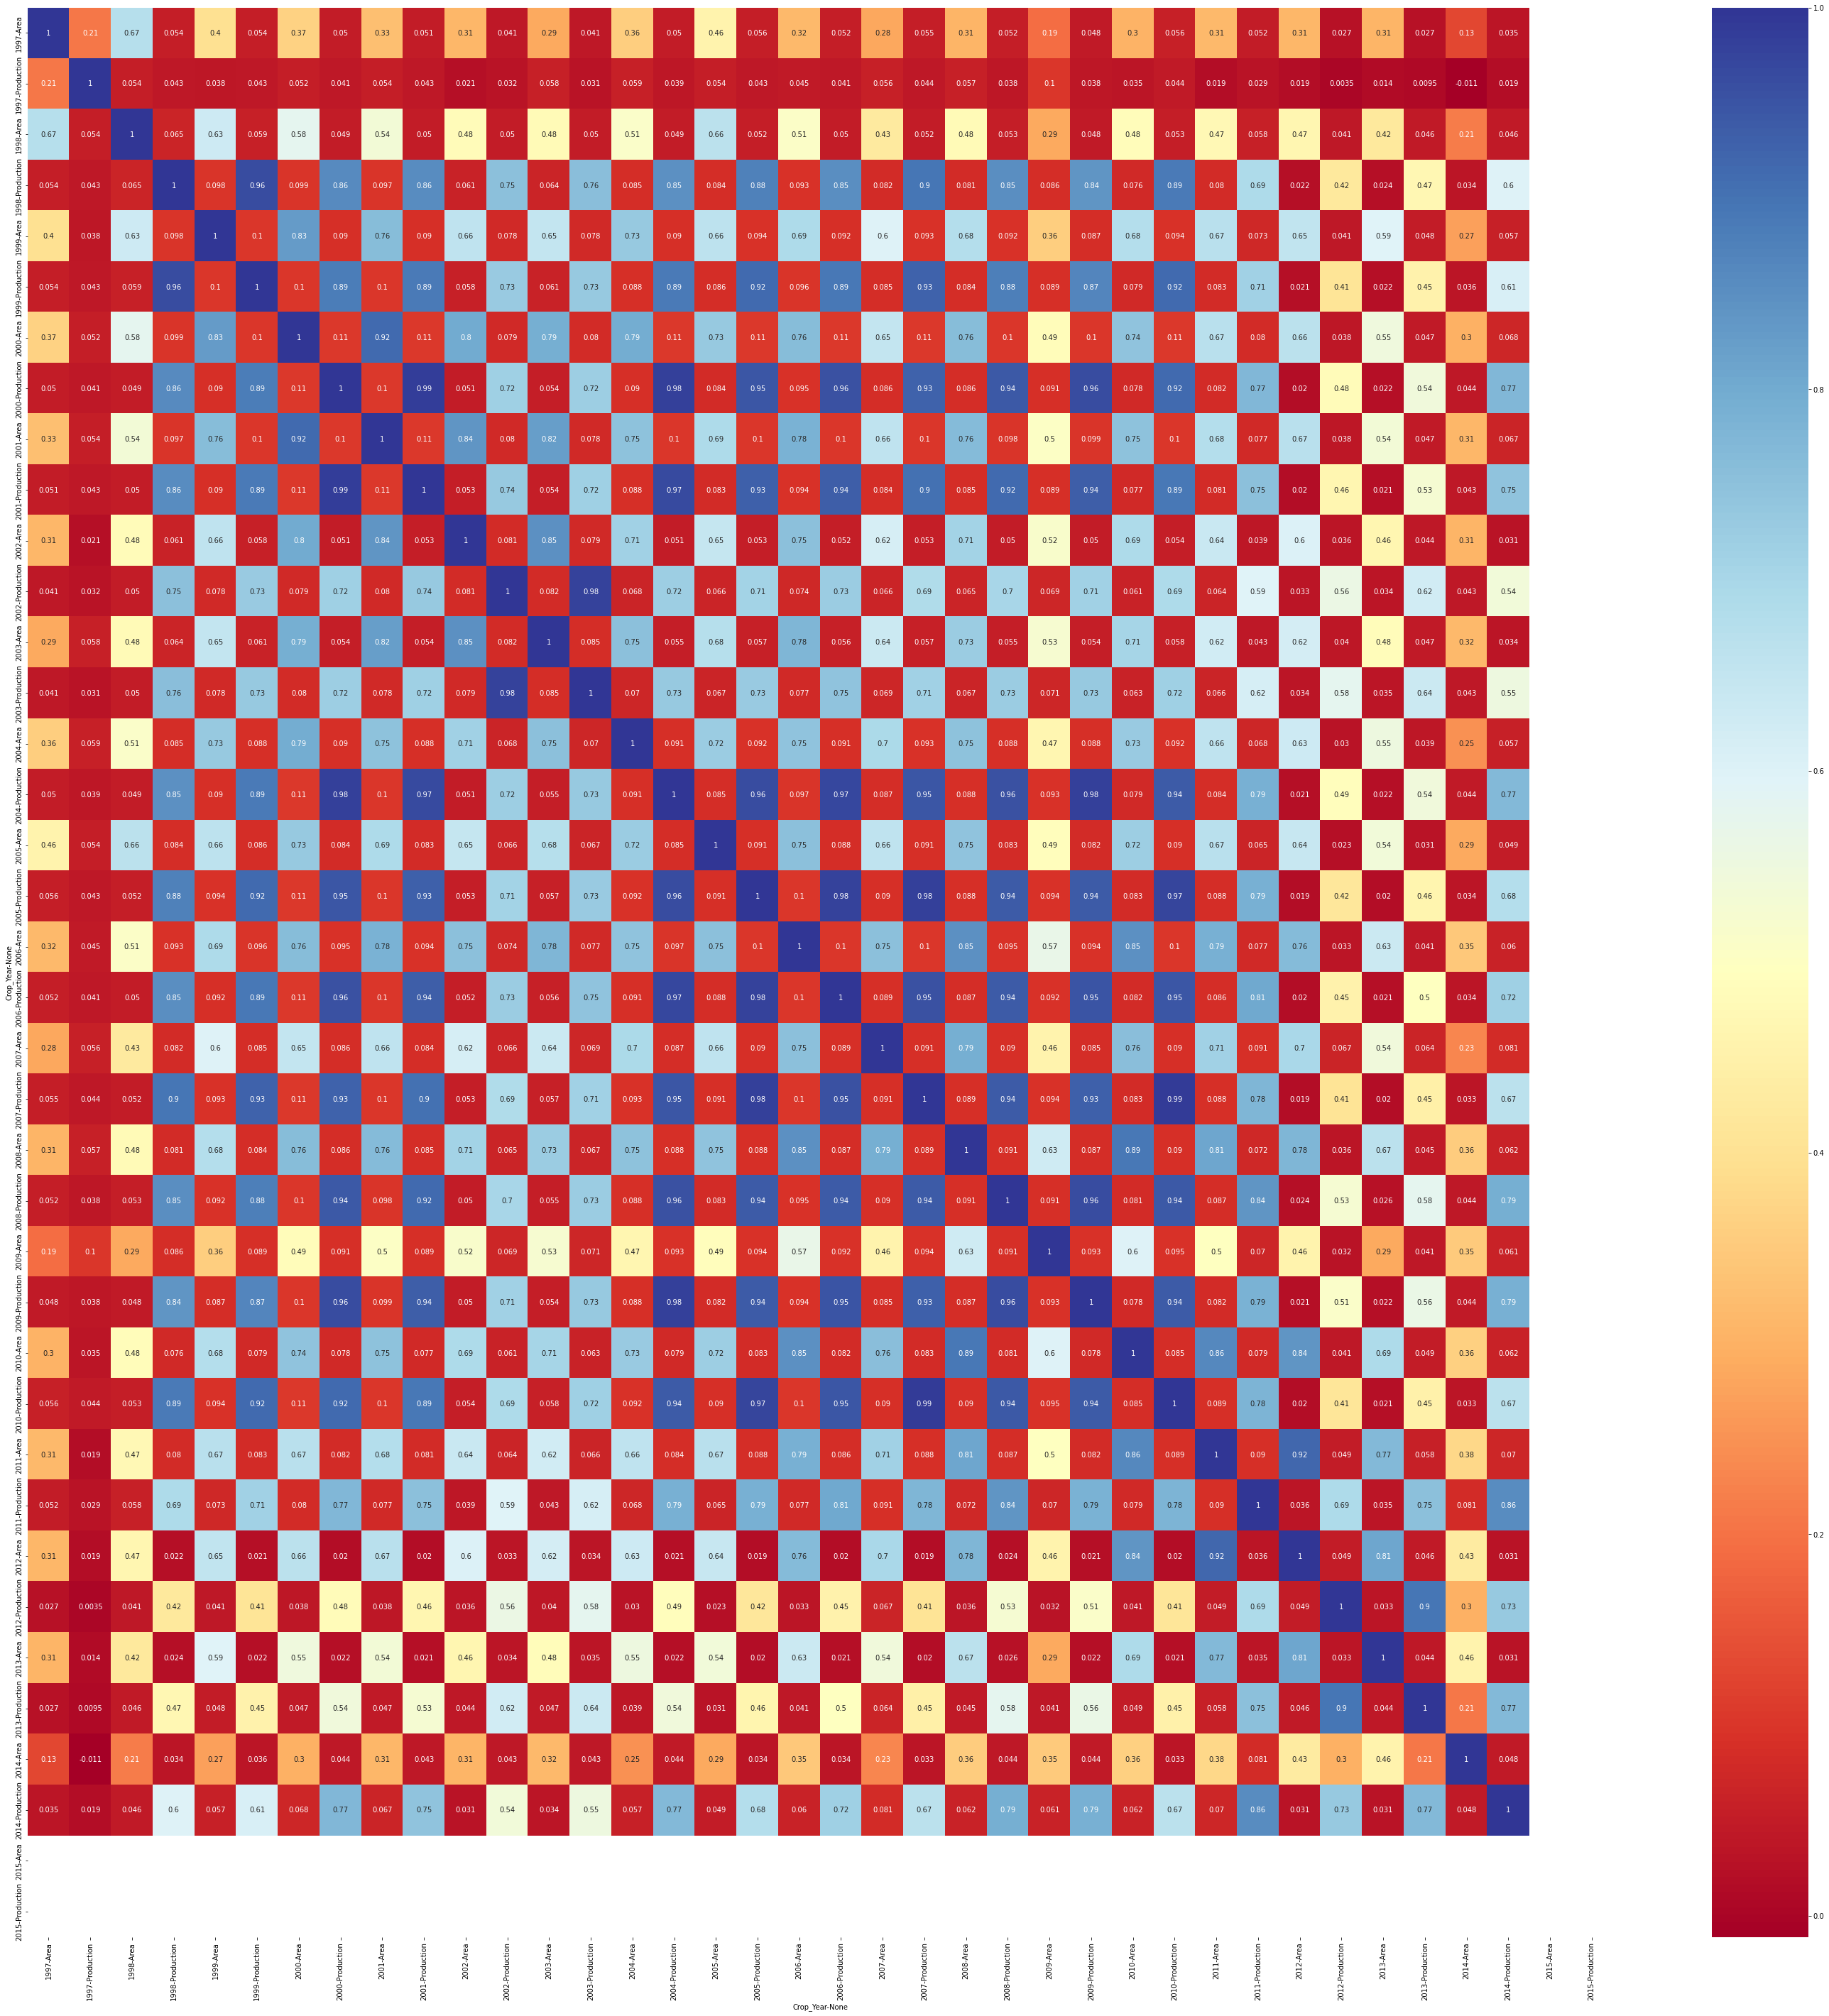

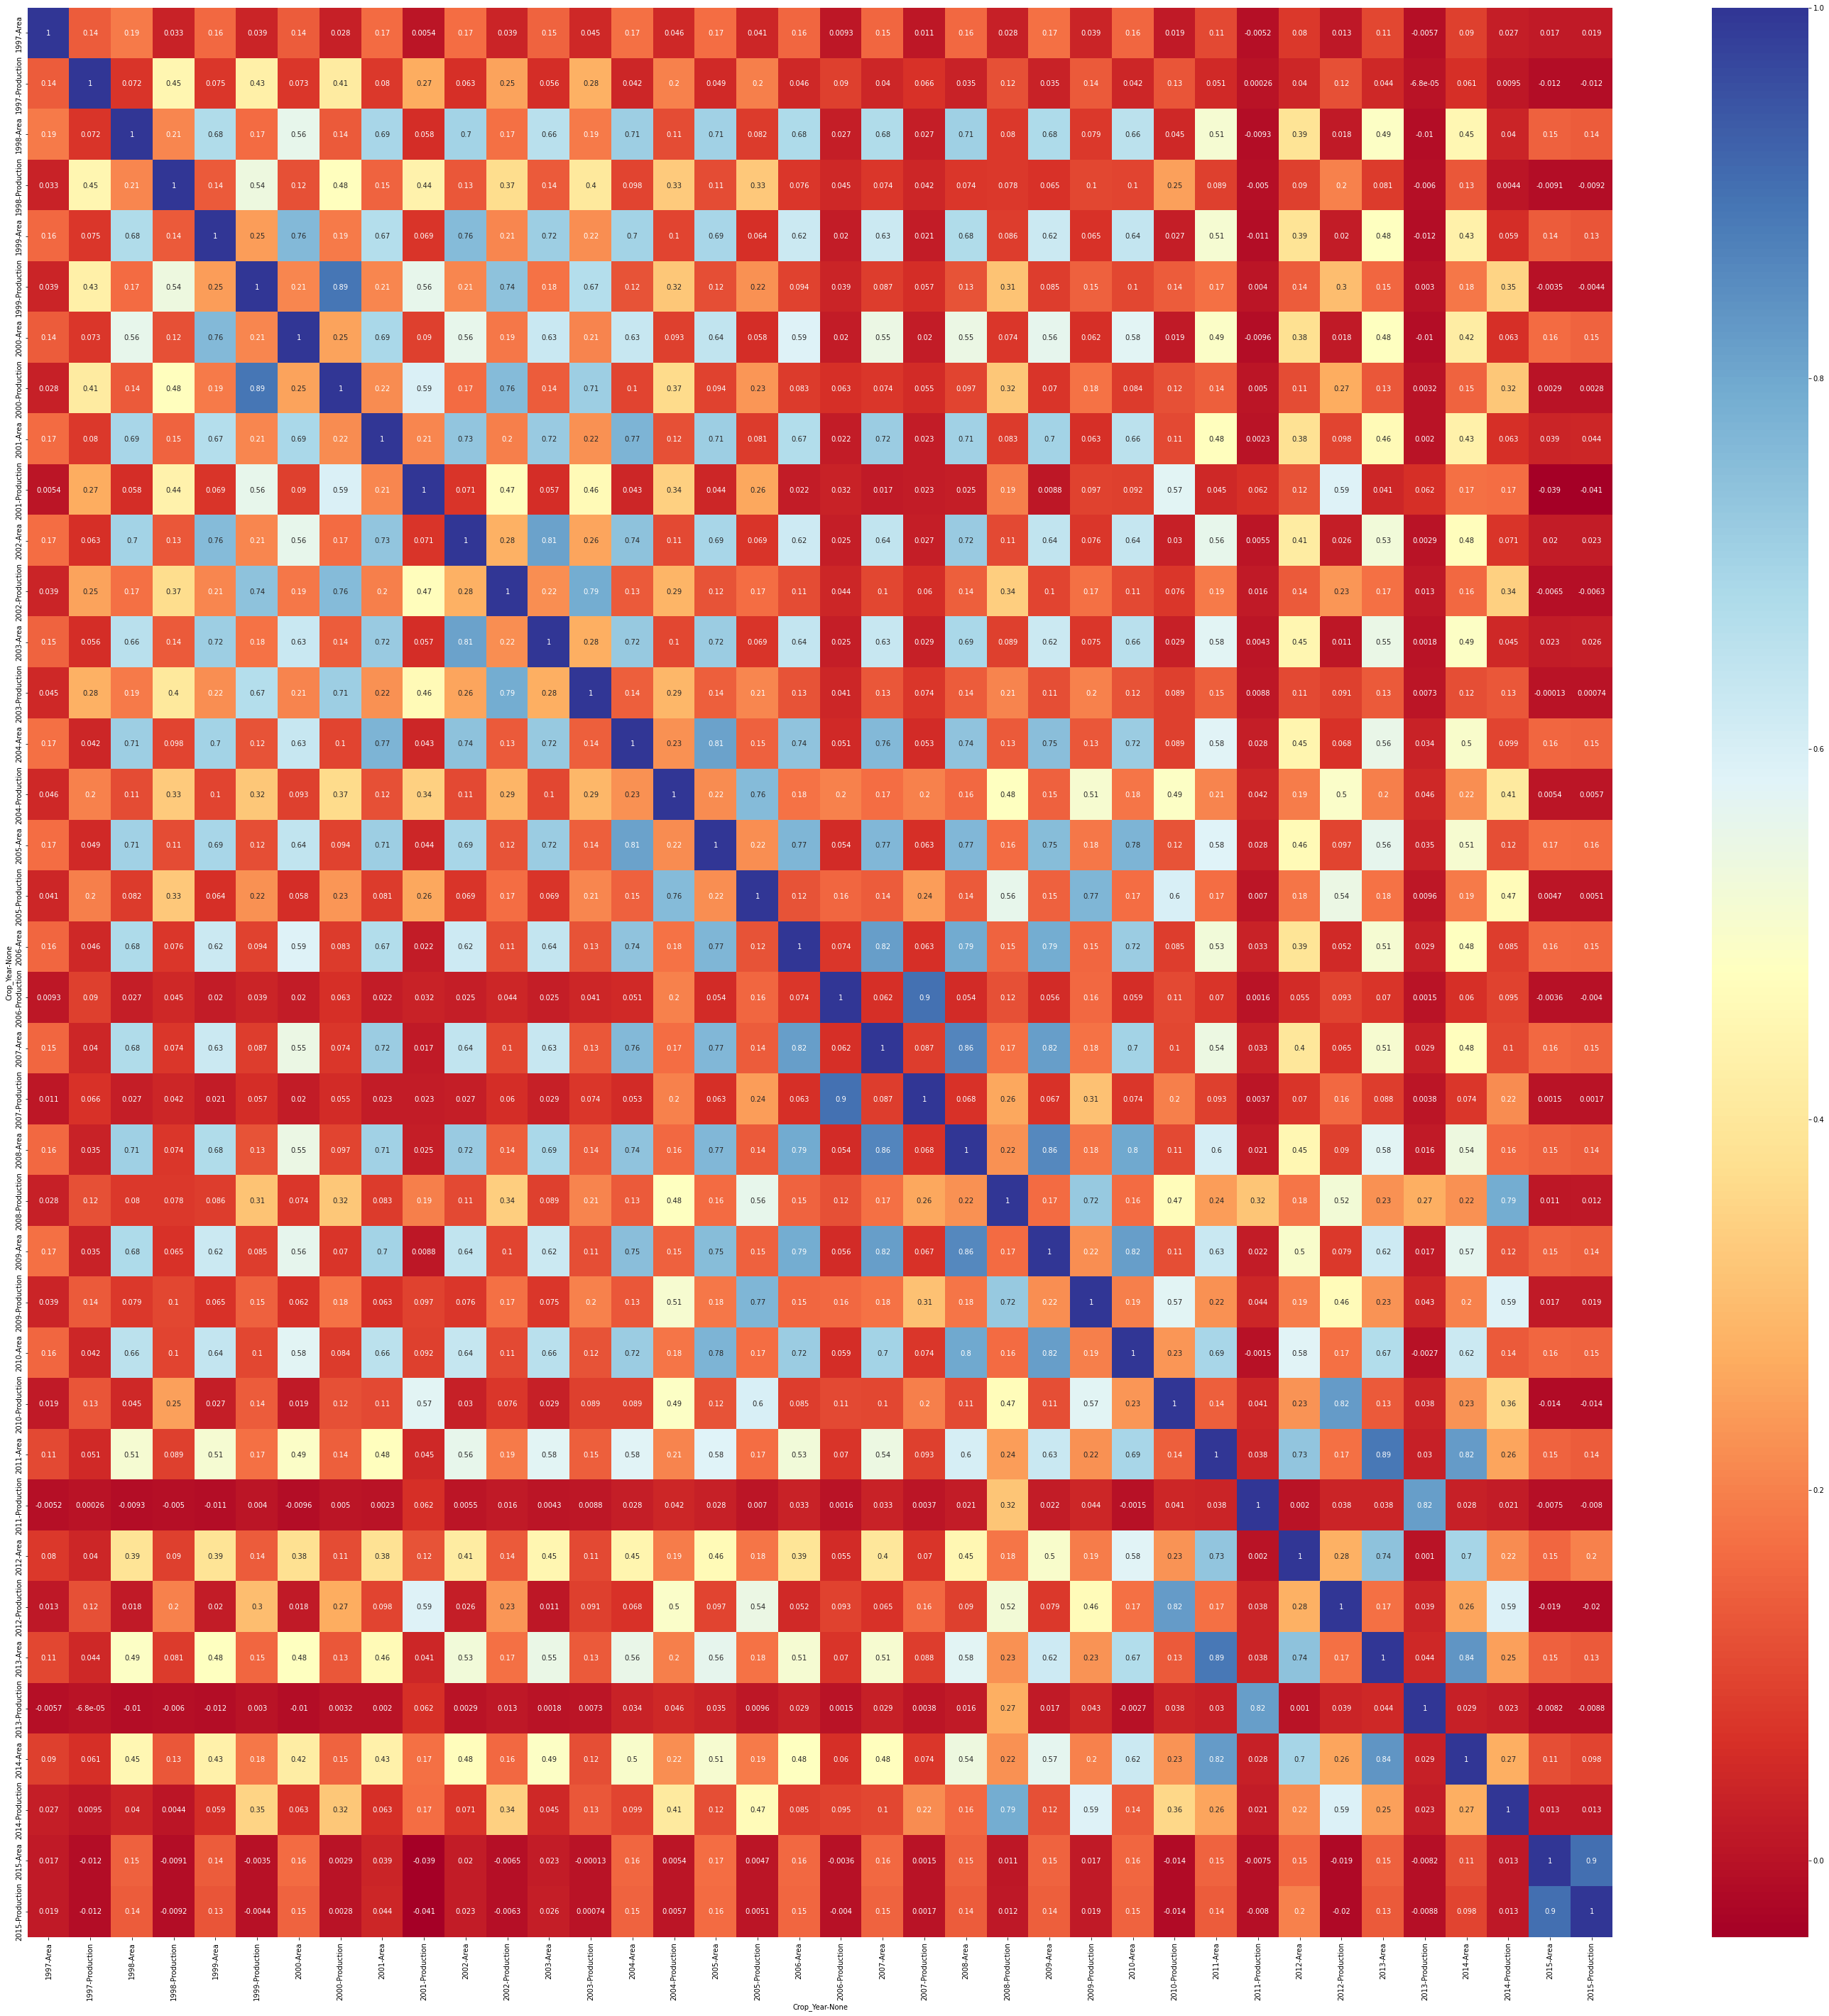

In [ ]:
import seaborn as sns

df1 = df1.fillna(df1.mean())
df2 = df2.fillna(df2.median())
plt.figure(figsize=(50, 50))
correlation1 = df1.corr()
sns.heatmap(correlation1, annot=True, cmap="RdYlBu")
plt.show()
plt.figure(figsize=(50,50))
correlation2 = df2.corr()
sns.heatmap(correlation2 ,annot=True, cmap="RdYlBu")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df1)
print(scaler.transform(df1))

[[5.10225622e-02 1.23776656e-02 2.61069143e-02 ... 2.88888827e-03
             nan            nan]
 [5.10225622e-02 1.23776656e-02 2.61069143e-02 ... 2.88888827e-03
             nan            nan]
 [5.10225622e-02 1.23776656e-02 2.61069143e-02 ... 2.88888827e-03
             nan            nan]
 ...
 [1.14165818e-01 1.36867697e-03 1.01693726e-01 ... 6.99300699e-07
             nan            nan]
 [1.14165818e-01 1.36867697e-03 3.82667350e-02 ... 1.99800200e-05
             nan            nan]
 [4.64029601e-02 5.90358803e-04 3.11163018e-02 ... 8.09190809e-06
             nan            nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df2)
print(scaler.transform(df2))

[[-0.15458985 -0.10749312 -0.23265523 ... -0.10945208 -0.19660714
  -0.21011198]
 [-0.15458985 -0.10749312 -0.28909806 ... -0.10945208 -0.19660714
  -0.21011198]
 [-0.16065196 -0.10910562 -0.28909806 ... -0.11074273 -0.19660714
  -0.21011198]
 ...
 [ 1.82819227  0.45805206  5.50327111 ...  0.66080463 -0.19660714
  -0.21011198]
 [ 1.82819227  0.45805206  5.50327111 ...  0.66080463 -0.19660714
  -0.21011198]
 [-0.1504411  -0.10757499 -0.29666654 ... -0.11075822 -0.19660714
  -0.21011198]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
